In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#import and read data
df = pd.read_csv("medical_market_basket.csv")
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(15002, 20)

In [ ]:
df.iloc[3]

Presc01                   citalopram
Presc02                      benicar
Presc03    amphetamine salt combo xr
Presc04                          NaN
Presc05                          NaN
Presc06                          NaN
Presc07                          NaN
Presc08                          NaN
Presc09                          NaN
Presc10                          NaN
Presc11                          NaN
Presc12                          NaN
Presc13                          NaN
Presc14                          NaN
Presc15                          NaN
Presc16                          NaN
Presc17                          NaN
Presc18                          NaN
Presc19                          NaN
Presc20                          NaN
Name: 3, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [ ]:
#remove empty rows from dataset  
df = df[df['Presc01'].notna()]
df.shape 

(7501, 20)

In [ ]:
#Convert dataframe into list to be able to turn into transaction for analysis 
rows = []
for i in range(0,7501):
    rows.append([str(df.values[i,j])
for j in range(0,20)])

In [ ]:
#Create a transaction from the list created to be able to use for apiori 
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

transaction = pd.DataFrame(array, columns = DE.columns_)

In [ ]:
transaction

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#print transaction list -- review data 
for col in transaction.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [ ]:
#clean our data -- remove the nan 
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(5)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#export data to csv for task submission 
cleaned_df.to_csv('MBA_data.csv', index = False)
cleaned_df.columns

Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)

In [ ]:
#Begin apriori analysis -- read our cleaned data
df = pd.read_csv("MBA_data.csv")
df.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#review shape --
df.shape

(7501, 119)

In [ ]:
#create a count for the medications and prescriptions transactions 
count = df.iloc[:,:].sum()
count = count.sort_values(0, ascending = False).head(2)
count

/var/folders/tk/ftj9mm4j27n1f7xz4bbbdksr0000gn/T/ipykernel_37092/2045118153.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count = count.sort_values(0, ascending = False).head(2)


abilify                      1788
amphetamine salt combo xr    1348
dtype: int64

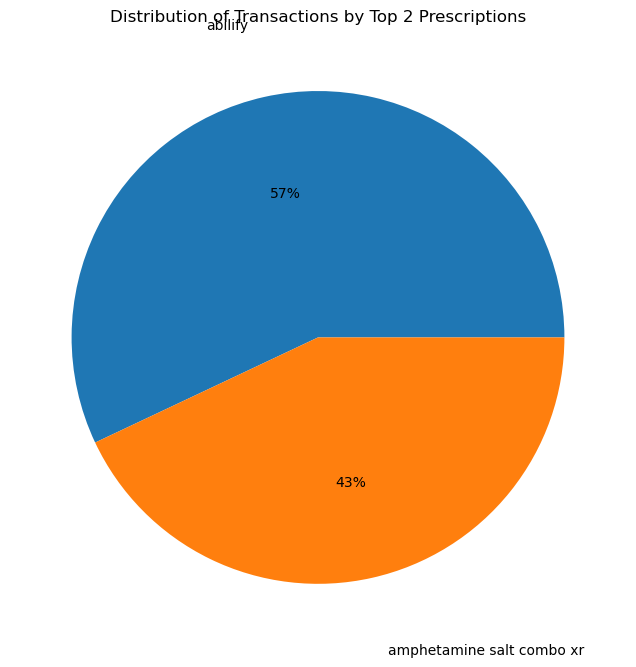

In [ ]:
#Create a pie chart to show distribution of transactions
plt.figure(figsize=[8,8])
plt.pie(count,labels=count.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Top 2 Prescriptions")
plt.show()

In [ ]:
#Apply apiori algorithm  -- indicate the top two transactions 
frequent_prescriptions = apriori(df, min_support = 0.02, use_colnames = True)
frequent_prescriptions.sort_values(['support'], ascending =[False])

,support,itemsets
1,0.238368,(abilify)
8,0.179709,(amphetamine salt combo xr)
11,0.174110,(carvedilol)
29,0.170911,(glyburide)
19,0.163845,(diazepam)
...,...,...
2,0.020397,(albuterol aerosol)
67,0.020264,"(levofloxacin, abilify)"
64,0.020131,"(fenofibrate, abilify)"
72,0.020131,"(naproxen, abilify)"


In [ ]:
#apply association rules with lift > 1 for quality measurements 
presc_rules = association_rules(frequent_prescriptions, metric = 'lift', min_threshold = 1.0)
presc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
1,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
...,...,...,...,...,...,...,...,...,...,...
89,(diazepam),(metoprolol),0.163845,0.095321,0.022930,0.139951,1.468215,0.007312,1.051893,0.381390
90,(doxycycline hyclate),(glyburide),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
91,(glyburide),(doxycycline hyclate),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
92,(losartan),(glyburide),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286


In [ ]:
#review lift rule by ascending... highest meeans most likely consequent is given when antecedent is given (While still controlling for how popular consequent is)
lift_rule = presc_rules.sort_values(['lift'], ascending =[False])
lift_rule.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
72,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [ ]:
#review support ... highest most frequent (how popular it is) 
support_rule = presc_rules.sort_values(['support'], ascending =[False])
support_rule.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
19,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [ ]:
#review confidence... how likely consequents is prescribed when antecendet is prescribed 
#proportion of transactions with x in which y is apparent 
confidence_rule = presc_rules.sort_values(['confidence'], ascending =[False])
confidence_rule.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
24,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [ ]:
#Top 3 rules and their calculations - support .02, lift > 1.5 > confidence > .4 
top_3 = presc_rules[(presc_rules['lift'] > 1.5) & (presc_rules['confidence'] > 0.4)].sort_values(by=['lift'], ascending= False)
top_3.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
24,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [ ]:
#Analysis from initial question -- top two medications 
presc_rules[(presc_rules['antecedents'] == {'abilify'}) & (presc_rules['consequents'] == {'amphetamine salt combo'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.49653,0.008095,1.03783,0.435627


In [ ]:
#analysis from initial question -- top two medications 
presc_rules[(presc_rules['antecedents'] == {'amphetamine salt combo'}) & (presc_rules['consequents'] == {'abilify'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.49653,0.008095,1.183991,0.356144
